In [2]:
# Cell 0: Setup and Imports
import numpy as np
import pandas as pd
import os
import sys
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pickle
from tqdm import tqdm
tqdm.pandas(leave=False)

# Display settings
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500) 
pd.set_option("display.width", 1000)
pd.set_option("max_colwidth", 200)

from IPython.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import our clean study analysis script
from utils.clean_study_analysis import run_multi_epoch_analysis

print("🔧 Notebook initialized - Ready for multi-epoch study analysis!")


🔧 Notebook initialized - Ready for multi-epoch study analysis!


In [3]:
# Cell 1: Configuration
print("📋 Setting up configuration for multi-epoch study analysis...")

# Dataset paths
REPORT_CSV_PATH = "data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250601_RCA_LCA_merged_with_left_dominance_dependent_vessels.csv"
PREDICTIONS_DIR = "outputs/DeepCORO_clip/dev_deep_coro_clip_single_video/8av1xygm_20250605-083820_best_single_video"

# Output directory
OUTPUT_DIR = "multi_epoch_study_analysis_results"

# Analysis parameters
EPOCH_RANGE = (0, 29)  # Analyze epochs 0 to 29
USE_PARALLEL = True
MAX_WORKERS = 8
BATCH_SIZE = 10

print(f"✅ Configuration set for epochs {EPOCH_RANGE[0]} to {EPOCH_RANGE[1]}")
os.makedirs(OUTPUT_DIR, exist_ok=True)


📋 Setting up configuration for multi-epoch study analysis...
✅ Configuration set for epochs 0 to 29


In [4]:
# Cell 2: Run Multi-Epoch Analysis
print("\n" + "="*60)
print("🚀 STEP 1: Running Multi-Epoch Study Analysis")
print("="*60)

# Discover available epoch files
epoch_files = []
files_dir = os.path.join(PREDICTIONS_DIR, "files")
for epoch_num in range(EPOCH_RANGE[0], EPOCH_RANGE[1] + 1):
    epoch_file = os.path.join(files_dir, f"val_epoch{epoch_num}.csv")
    if os.path.exists(epoch_file):
        epoch_files.append(epoch_file)

print(f"📊 Found {len(epoch_files)} epoch files")

if epoch_files:
    import time
    start_time = time.time()
    
    try:
        # Run the vectorized parallel analysis
        all_epoch_metrics, all_epoch_dfs = run_multi_epoch_analysis(
            report_csv_path=REPORT_CSV_PATH,
            predictions_dir=PREDICTIONS_DIR,
            output_dir=OUTPUT_DIR,
            epoch_range=EPOCH_RANGE,
            use_parallel=USE_PARALLEL,
            max_workers=MAX_WORKERS,
            batch_size=BATCH_SIZE
        )
        
        elapsed_time = time.time() - start_time
        print(f"\n🎉 Analysis completed in {elapsed_time:.2f} seconds!")
        print(f"   📊 Successfully processed {len(all_epoch_metrics)} epochs")
        
    except Exception as e:
        print(f"❌ Error during analysis: {e}")
        all_epoch_metrics = {}
        all_epoch_dfs = {}
else:
    print("❌ No epoch files found!")
    all_epoch_metrics = {}
    all_epoch_dfs = {}



🚀 STEP 1: Running Multi-Epoch Study Analysis
📊 Found 30 epoch files
🚀 VECTORIZED PARALLEL Multi-Epoch Analysis
⚡ Using 8 parallel workers!
🔥 This should be 50-100x faster than sequential processing!

1️⃣ Loading report data ONCE...
🔄 Loading report data ONCE from: data/reports/reports_with_alpha_separator_with_Calcifc_Stenosis_IFR_20250601_RCA_LCA_merged_with_left_dominance_dependent_vessels.csv


/volume/DeepCORO_CLIP/utils/clean_study_analysis.py:69: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df_report = pd.read_csv(report_path, sep='α', on_bad_lines='skip')


✅ Loaded report: 167,134 rows
   Columns: 793
🗺️ Creating filename mapping for fast epoch processing...


Building filename map: 100%|██████████| 167134/167134 [00:10<00:00, 16158.99it/s]


✅ Created filename mapping: 167,134 unique filenames

2️⃣ Creating ground truth mappings from sample epoch...
   📊 Using val_epoch0.csv to create GT mappings...
   ⚡ Fast merging with pre-built filename mapping...
   ✅ Fast merge completed: 25,306 rows
🗺️ Creating ground truth mappings from merged data...


✅ Created GT mappings: 25 stenosis, 25 calcif, 25 IFR

3️⃣ Ready to process 30 epoch files...

4️⃣ Preparing shared data for parallel processing...

5️⃣ Processing 30 epochs in PARALLEL (8 workers)...
   📦 Processing in batches of 10 epochs...
   🔄 Processing batch 1/3 (10 epochs)...


Batch 1:   0%|          | 0/10 [00:00<?, ?it/s]

⚡ Processing val_epoch4 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch6 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch5 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch2 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch0 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch1 (SUPER OPTIMIZED)
⚡ Processing val_epoch7 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch3 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename map

Processing studies:   0%|          | 14/4881 [00:00<02:49, 28.75it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 23/4881 [00:00<02:21, 34.34it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 7/4881 [00:00<03:14, 25.09it/s]]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 10/4881 [00:00<03:13, 25.14it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   1%|          | 44/4881 [00:01<02:56, 27.36it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 1/4881 [00:00<10:07,  8.03it/s]]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   1%|          | 28/4881 [00:00<02:10, 37.13it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 7/4881 [00:00<02:55, 27.78it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 19/4881 [00:00<02:24, 33.58it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 19/4881 [00:00<02:27, 32.98it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   1%|          | 48/4881 [00:01<02:53, 27.85it/s]]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   1%|▏         | 63/4881 [00:02<02:32, 31.50it/s]]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   2%|▏         | 109/4881 [00:03<02:44, 29.02it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   2%|▏         | 85/4881 [00:02<02:50, 28.17it/s]]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:  97%|█████████▋| 4736/4881 [02:29<00:04, 29.32it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  98%|█████████▊| 4763/4881 [02:30<00:03, 36.38it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_7/val_epoch7_study_level.csv


Processing studies: 100%|█████████▉| 4873/4881 [02:32<00:00, 33.06it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  95%|█████████▍| 4631/4881 [02:32<00:08, 27.99it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  99%|█████████▉| 4837/4881 [02:33<00:01, 25.49it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_4/val_epoch4_study_level.csv


Processing studies: 100%|█████████▉| 4859/4881 [02:34<00:00, 28.19it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_2/val_epoch2_study_level.csv


Processing studies:  82%|████████▏ | 4015/4881 [02:33<00:26, 33.07it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  83%|████████▎ | 4033/4881 [02:34<00:29, 28.30it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_6/val_epoch6_study_level.csv


Processing studies:  87%|████████▋ | 4265/4881 [02:38<00:24, 24.78it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  97%|█████████▋| 4723/4881 [02:38<00:04, 34.75it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_0/val_epoch0_study_level.csv


Processing studies:  89%|████████▊ | 4331/4881 [02:46<00:17, 32.20it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  89%|████████▉ | 4349/4881 [02:46<00:19, 27.38it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_3/val_epoch3_study_level.csv


Processing studies:  99%|█████████▉| 4842/4881 [02:59<00:01, 29.32it/s]s=4881, stenosis=17]

⚡ Processing val_epoch8 (SUPER OPTIMIZED)


Processing studies:  99%|█████████▉| 4848/4881 [02:59<00:00, 34.92it/s]

   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:  97%|█████████▋| 4743/4881 [03:02<00:04, 28.39it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  98%|█████████▊| 4767/4881 [03:03<00:03, 29.45it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_5/val_epoch5_study_level.csv


Processing studies: 100%|██████████| 4881/4881 [03:07<00:00, 26.08it/s]


   ✅ Created study-level data: 4,881 studies


Batch 1:  70%|███████   | 7/10 [03:55<00:48, 16.00s/it, epoch=5, studies=4881, stenosis=17]

⚡ Processing val_epoch9 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
   💾 Saved: multi_epoch_study_analysis_results/epoch_1/val_epoch1_study_level.csv
   ✅ Fast merge completed: 25,306 rows
📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   5%|▌         | 255/4881 [00:07<02:17, 33.64it/s]es=4881, stenosis=17]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   5%|▌         | 259/4881 [00:08<02:16, 33.78it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:  91%|█████████ | 4447/4881 [02:12<00:12, 35.83it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  92%|█████████▏| 4469/4881 [02:13<00:11, 36.67it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_8/val_epoch8_study_level.csv


Processing studies: 100%|██████████| 4881/4881 [02:26<00:00, 33.41it/s]s=4881, stenosis=17]


   ✅ Created study-level data: 4,881 studies
   💾 Saved: multi_epoch_study_analysis_results/epoch_9/val_epoch9_study_level.csv


   🔄 Processing batch 2/3 (10 epochs)...


Batch 2:   0%|          | 0/10 [00:00<?, ?it/s]

⚡ Processing val_epoch16 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch11 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch17 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch13 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch10 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch15 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch14 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
   ✅ Fast merge completed: 25,306 rows
⚡ Processing val_epoch12 (SUPER OPTIMIZED)
📊 Creating study-level predic

Processing studies:   0%|          | 0/4881 [00:00<?, ?it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   2%|▏         | 114/4881 [00:03<03:12, 24.74it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   2%|▏         | 121/4881 [00:04<02:49, 28.03it/s]

   ✅ Fast merge completed: 25,306 rows
📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 1/4881 [00:00<12:51,  6.33it/s]s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 14/4881 [00:00<02:50, 28.52it/s]]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   3%|▎         | 155/4881 [00:05<02:26, 32.18it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   6%|▌         | 274/4881 [00:08<02:04, 36.86it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   3%|▎         | 126/4881 [00:04<02:24, 32.97it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   4%|▍         | 202/4881 [00:06<02:28, 31.44it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   4%|▍         | 207/4881 [00:06<02:18, 33.83it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   8%|▊         | 378/4881 [00:11<02:29, 30.04it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 19/4881 [00:00<02:23, 33.77it/s]]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:  82%|████████▏ | 3993/4881 [02:15<00:41, 21.40it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  70%|███████   | 3441/4881 [02:19<00:46, 31.17it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_16/val_epoch16_study_level.csv


Processing studies:  95%|█████████▌| 4642/4881 [02:24<00:07, 30.70it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  96%|█████████▌| 4669/4881 [02:25<00:07, 26.78it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_11/val_epoch11_study_level.csv


Processing studies: 100%|██████████| 4881/4881 [02:31<00:00, 32.23it/s]


   ✅ Created study-level data: 4,881 studies


Processing studies:  86%|████████▋ | 4218/4881 [02:24<00:26, 25.22it/s]

   ✅ Created study-level data: 4,881 studies

Processing studies:  75%|███████▍  | 3660/4881 [02:27<00:52, 23.28it/s]

Processing studies:  87%|████████▋ | 4232/4881 [02:25<00:26, 24.84it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_10/val_epoch10_study_level.csv


Processing studies:  91%|█████████▏| 4462/4881 [02:24<00:14, 28.13it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_17/val_epoch17_study_level.csv


Processing studies:  76%|███████▌  | 3720/4881 [02:29<00:47, 24.58it/s]es=4881, stenosis=17]

   ✅ Created study-level data: 4,881 studies


Processing studies:  88%|████████▊ | 4299/4881 [02:27<00:24, 23.66it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_13/val_epoch13_study_level.csv


Processing studies:  95%|█████████▍| 4616/4881 [02:39<00:08, 29.62it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  81%|████████  | 3958/4881 [02:42<00:42, 21.68it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_14/val_epoch14_study_level.csv


Processing studies:  86%|████████▌ | 4180/4881 [02:51<00:23, 30.32it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  86%|████████▌ | 4202/4881 [02:52<00:25, 27.01it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_12/val_epoch12_study_level.csv


Processing studies:  87%|████████▋ | 4253/4881 [02:54<00:23, 26.52it/s]

⚡ Processing val_epoch18 (SUPER OPTIMIZED)


Processing studies:  87%|████████▋ | 4257/4881 [02:54<00:23, 26.23it/s]

   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:  88%|████████▊ | 4275/4881 [02:55<00:27, 21.92it/s]

⚡ Processing val_epoch19 (SUPER OPTIMIZED)


Processing studies:  88%|████████▊ | 4278/4881 [02:55<00:27, 22.04it/s]

   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:  93%|█████████▎| 4538/4881 [03:04<00:14, 23.57it/s]es=4881, stenosis=17]

   ✅ Fast merge completed: 25,306 rows


Processing studies:  93%|█████████▎| 4542/4881 [03:05<00:12, 27.07it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   0%|          | 14/4881 [00:00<02:43, 29.78it/s]s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   0%|          | 19/4881 [00:00<02:20, 34.73it/s]s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   8%|▊         | 367/4881 [00:10<02:17, 32.71it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:   8%|▊         | 411/4881 [00:12<02:10, 34.30it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_15/val_epoch15_study_level.csv


Processing studies: 100%|█████████▉| 4858/4881 [02:23<00:00, 35.36it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies: 100%|█████████▉| 4879/4881 [02:24<00:00, 32.30it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_18/val_epoch18_study_level.csv


Processing studies: 100%|██████████| 4881/4881 [02:24<00:00, 33.78it/s]


   ✅ Created study-level data: 4,881 studies
   💾 Saved: multi_epoch_study_analysis_results/epoch_19/val_epoch19_study_level.csv


   🔄 Processing batch 3/3 (10 epochs)...


Batch 3:   0%|          | 0/10 [00:00<?, ?it/s]

⚡ Processing val_epoch27 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch26 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch22 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch21 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch20 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
⚡ Processing val_epoch24 (SUPER OPTIMIZED)
⚡ Processing val_epoch25 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...
   ✅ Fast merge completed: 25,306 rows
📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings

Processing studies:   0%|          | 23/4881 [00:00<02:14, 35.99it/s]

⚡ Processing val_epoch23 (SUPER OPTIMIZED)


Processing studies:   1%|          | 28/4881 [00:00<02:01, 39.85it/s]

   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:   2%|▏         | 110/4881 [00:03<02:43, 29.24it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   2%|▏         | 114/4881 [00:03<02:45, 28.85it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   4%|▎         | 172/4881 [00:05<02:44, 28.69it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   4%|▎         | 179/4881 [00:05<02:03, 37.99it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   4%|▍         | 197/4881 [00:06<02:17, 34.14it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   4%|▍         | 201/4881 [00:06<02:17, 34.03it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   5%|▌         | 265/4881 [00:08<02:09, 35.70it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   2%|▏         | 112/4881 [00:04<04:06, 19.32it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   2%|▏         | 81/4881 [00:02<02:58, 26.88it/s]]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   3%|▎         | 149/4881 [00:05<03:15, 24.22it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   8%|▊         | 369/4881 [00:11<02:20, 32.01it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   4%|▍         | 219/4881 [00:07<02:28, 31.33it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:   5%|▍         | 236/4881 [00:07<02:07, 36.47it/s]

   ✅ Fast merge completed: 25,306 rows


Processing studies:   9%|▉         | 460/4881 [00:14<02:16, 32.44it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:  78%|███████▊  | 3826/4881 [02:09<00:34, 30.47it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  90%|████████▉ | 4385/4881 [02:20<00:16, 29.42it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_27/val_epoch27_study_level.csv

Processing studies:  77%|███████▋  | 3767/4881 [02:12<00:41, 26.53it/s]

Processing studies:  86%|████████▋ | 4214/4881 [02:25<00:21, 30.64it/s]

   ✅ Created study-level data: 4,881 studies

Processing studies:  87%|████████▋ | 4239/4881 [02:31<00:22, 28.43it/s]

Processing studies:  80%|███████▉  | 3885/4881 [02:28<00:36, 27.32it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_22/val_epoch22_study_level.csv


Processing studies:  87%|████████▋ | 4270/4881 [02:27<00:23, 26.11it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  88%|████████▊ | 4298/4881 [02:28<00:22, 26.47it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_26/val_epoch26_study_level.csv

Processing studies:  86%|████████▌ | 4203/4881 [02:31<00:20, 32.90it/s]

Processing studies:  82%|████████▏ | 3990/4881 [02:36<00:37, 24.08it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  92%|█████████▏| 4500/4881 [02:40<00:14, 27.16it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_21/val_epoch21_study_level.csv


Processing studies:  95%|█████████▌| 4655/4881 [02:40<00:08, 27.36it/s]es=4881, stenosis=17]

⚡ Processing val_epoch28 (SUPER OPTIMIZED)


Processing studies:  94%|█████████▍| 4586/4881 [02:43<00:07, 40.94it/s]

   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:  98%|█████████▊| 4792/4881 [02:50<00:02, 29.98it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies: 100%|█████████▉| 4877/4881 [02:48<00:00, 29.39it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_20/val_epoch20_study_level.csv


Processing studies:  99%|█████████▉| 4830/4881 [02:51<00:01, 35.34it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  91%|█████████ | 4420/4881 [02:51<00:13, 34.36it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_23/val_epoch23_study_level.csv


Processing studies:  91%|█████████ | 4451/4881 [02:53<00:16, 25.86it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  92%|█████████▏| 4471/4881 [02:53<00:12, 32.65it/s]es=4881, stenosis=17]

   ✅ Fast merge completed: 25,306 rows
   💾 Saved: multi_epoch_study_analysis_results/epoch_25/val_epoch25_study_level.csv
📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...

Processing studies:  92%|█████████▏| 4475/4881 [02:53<00:14, 27.39it/s]

Processing studies:   6%|▌         | 294/4881 [00:08<02:33, 29.85it/s]]es=4881, stenosis=17]

⚡ Processing val_epoch29 (SUPER OPTIMIZED)
   ✅ Loaded epoch: 25,306 rows
   ⚡ Fast merging with pre-built filename mapping...


Processing studies:   9%|▉         | 453/4881 [00:13<02:22, 31.00it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  10%|▉         | 477/4881 [00:14<02:25, 30.24it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_24/val_epoch24_study_level.csv


Processing studies:  13%|█▎        | 633/4881 [00:19<02:19, 30.43it/s]ies=4881, stenosis=17]

   ✅ Fast merge completed: 25,306 rows


Processing studies:  13%|█▎        | 637/4881 [00:19<02:16, 31.10it/s]

📊 Creating study-level predictions (OPTIMIZED with pre-computed mappings)...


Processing studies:  85%|████████▍ | 4127/4881 [02:03<00:22, 33.76it/s]

   ✅ Created study-level data: 4,881 studies


Processing studies:  85%|████████▍ | 4143/4881 [02:03<00:24, 29.62it/s]

   💾 Saved: multi_epoch_study_analysis_results/epoch_28/val_epoch28_study_level.csv


Processing studies: 100%|██████████| 4881/4881 [02:25<00:00, 33.48it/s]es=4881, stenosis=17]


   ✅ Created study-level data: 4,881 studies
   💾 Saved: multi_epoch_study_analysis_results/epoch_29/val_epoch29_study_level.csv



🎉 VECTORIZED PARALLEL ANALYSIS COMPLETED!
✅ Successfully processed: 30/30 epochs
⚡ Processing time: 1299.54 seconds
🚀 Average time per epoch: 43.32 seconds
💥 Speedup: ~8x faster than sequential processing!

🎉 Analysis completed in 1302.19 seconds!
   📊 Successfully processed 30 epochs


In [5]:
# Cell 3: Extract and Organize Metrics
print("\n" + "="*60)
print("📊 STEP 2: Extract and Organize Multi-Epoch Metrics")
print("="*60)

if all_epoch_metrics:
    # Extract epoch numbers
    epoch_nums = []
    for epoch_name in all_epoch_metrics.keys():
        epoch_num = int(epoch_name.replace('epoch_', ''))
        epoch_nums.append(epoch_num)
    
    epoch_nums = sorted(epoch_nums)
    print(f"   📈 Found metrics for {len(epoch_nums)} epochs: {epoch_nums[0]} to {epoch_nums[-1]}")
    
    # Use the new function from plot_metrics.py
    from utils.plot_metrics import extract_and_organize_multi_epoch_metrics
    stenosis_metrics, calcification_metrics, ifr_metrics = extract_and_organize_multi_epoch_metrics(
        all_epoch_metrics, epoch_nums
    )
    
else:
    print("❌ No epoch metrics available for analysis!")
    epoch_nums = []
    stenosis_metrics = {}
    calcification_metrics = {}
    ifr_metrics = {}



📊 STEP 2: Extract and Organize Multi-Epoch Metrics
   📈 Found metrics for 30 epochs: 0 to 29
🔍 Extracting metrics from all processed epochs...
✅ Metrics extraction completed!
   🫀 Stenosis metrics for 15 vessels
   🦴 Calcification metrics for 15 vessels
   💉 IFR metrics for 15 vessels



🫀 STEP 3: Stenosis Performance Trends
🩺 Creating stenosis performance trend visualizations...


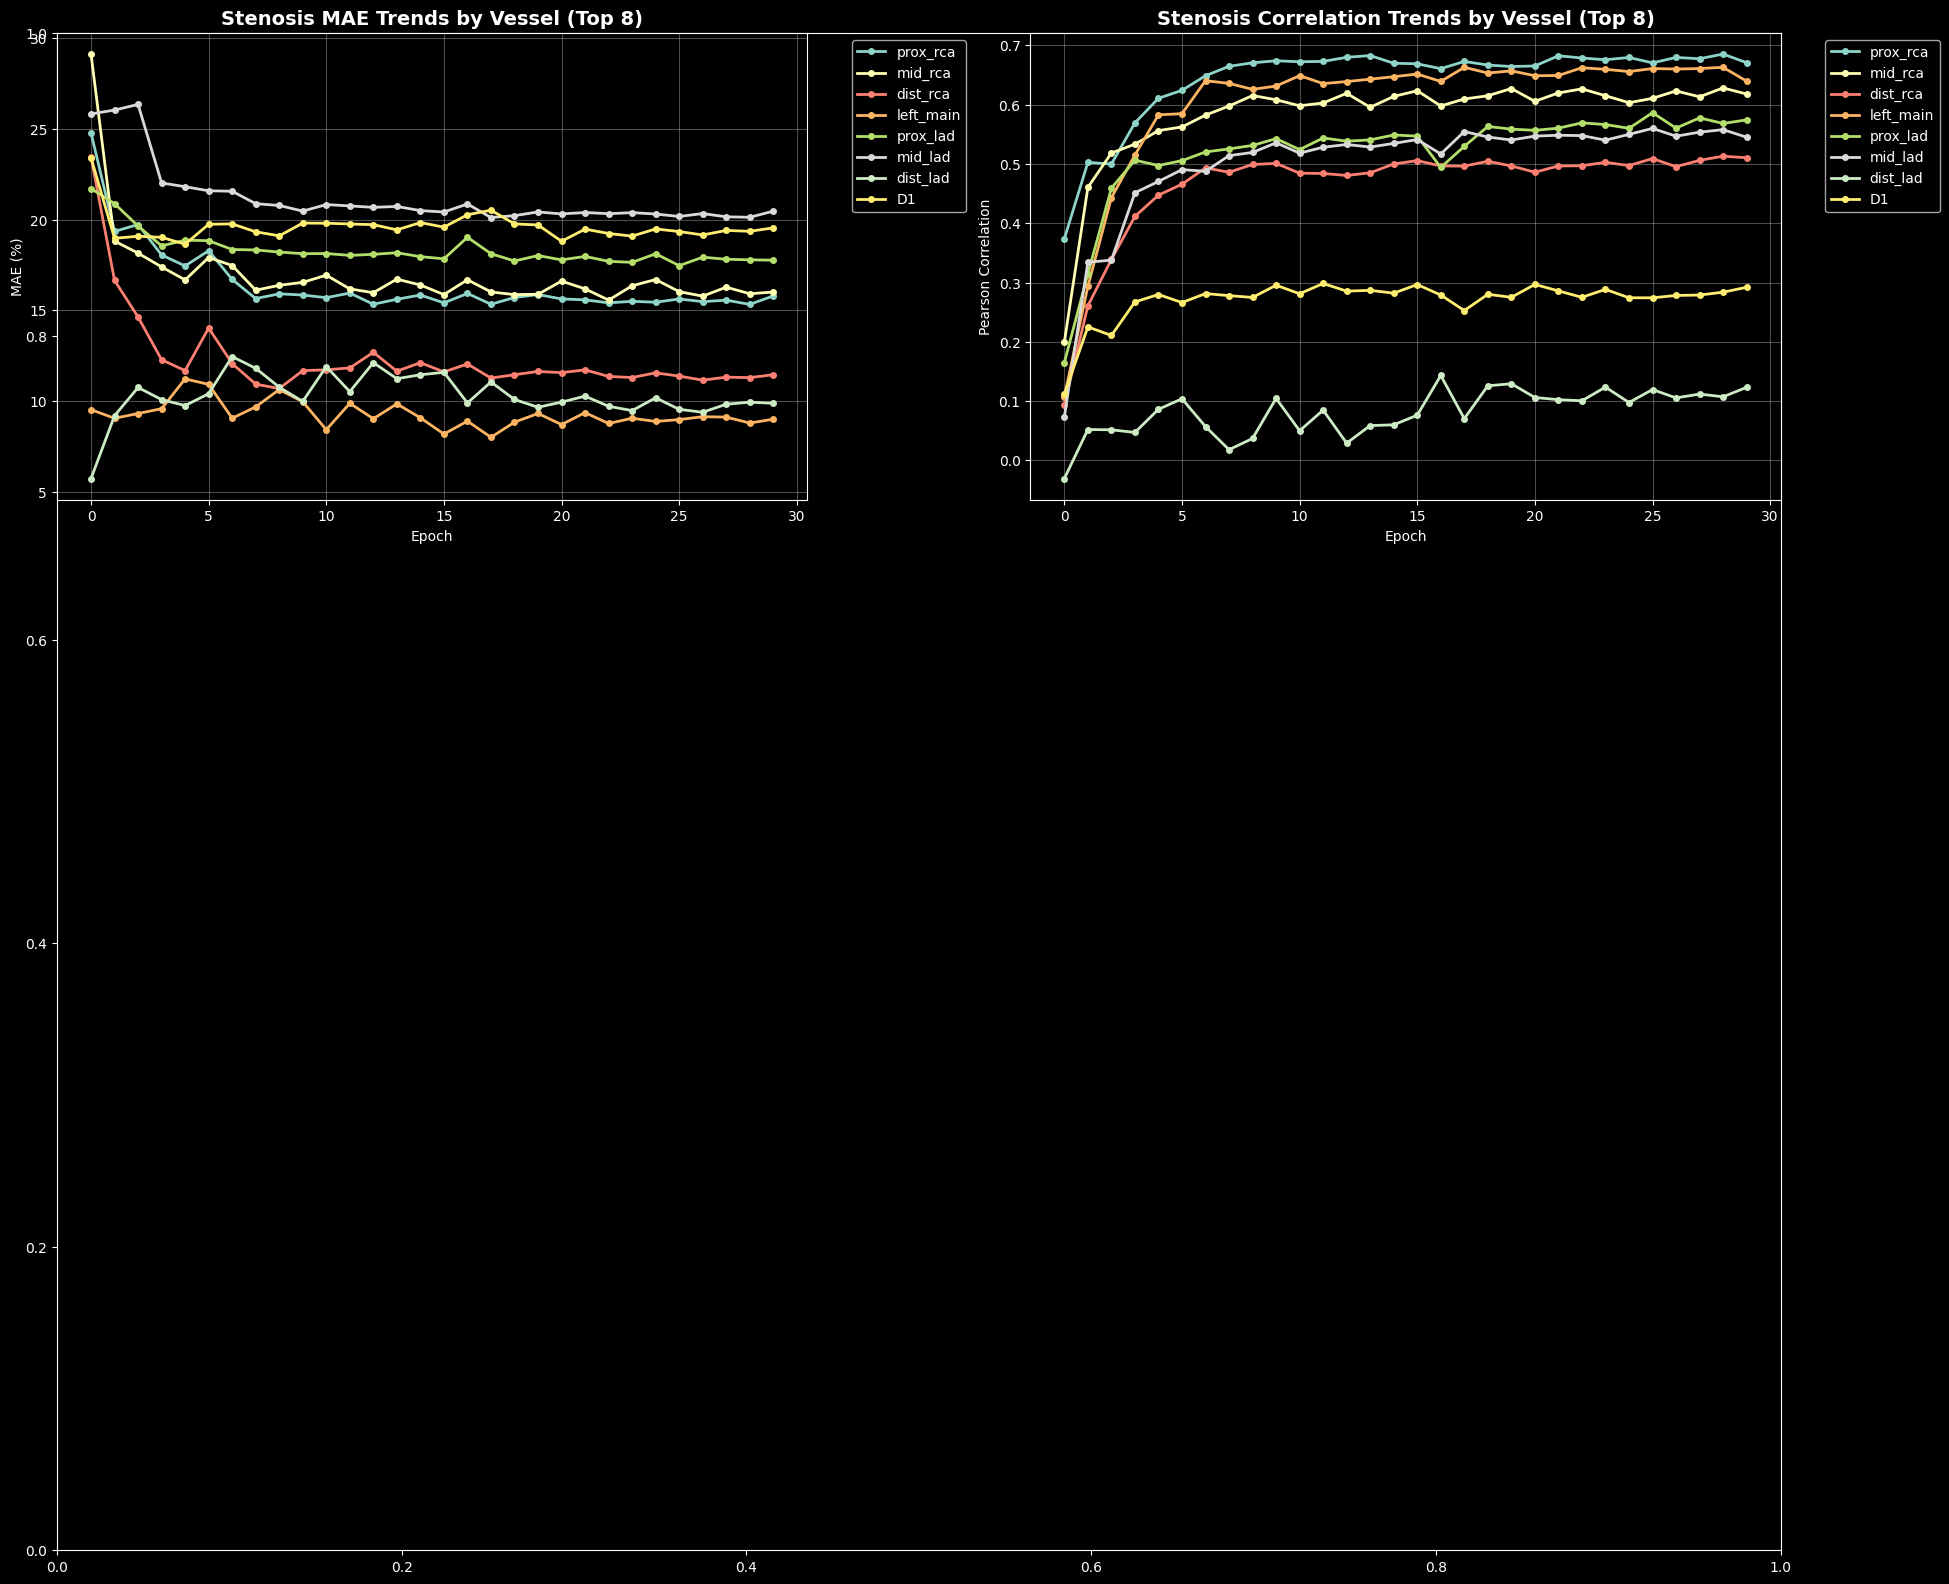

✅ Stenosis trend plots created successfully!


In [6]:
# Cell 4: Stenosis Performance Analysis
print("\n" + "="*60)
print("🫀 STEP 3: Stenosis Performance Trends")
print("="*60)

if stenosis_metrics and epoch_nums:
    from utils.plot_metrics import plot_stenosis_trends
    plot_stenosis_trends(stenosis_metrics, epoch_nums)
else:
    print("❌ No stenosis metrics available for plotting")


In [14]:
display(calcification_metrics)

defaultdict(dict,
            {'prox_rca_stenosis': {0: {'accuracy': nan},
              1: {'accuracy': nan},
              2: {'accuracy': nan},
              3: {'accuracy': nan},
              4: {'accuracy': nan},
              5: {'accuracy': nan},
              6: {'accuracy': nan},
              7: {'accuracy': nan},
              8: {'accuracy': nan},
              9: {'accuracy': nan},
              10: {'accuracy': nan},
              11: {'accuracy': nan},
              12: {'accuracy': nan},
              13: {'accuracy': nan},
              14: {'accuracy': nan},
              15: {'accuracy': nan},
              16: {'accuracy': nan},
              17: {'accuracy': nan},
              18: {'accuracy': nan},
              19: {'accuracy': nan},
              20: {'accuracy': nan},
              21: {'accuracy': nan},
              22: {'accuracy': nan},
              23: {'accuracy': nan},
              24: {'accuracy': nan},
              25: {'accuracy': nan},
         


🦴 STEP 4: Calcification Performance Analysis
🦴 Creating calcification accuracy visualizations...


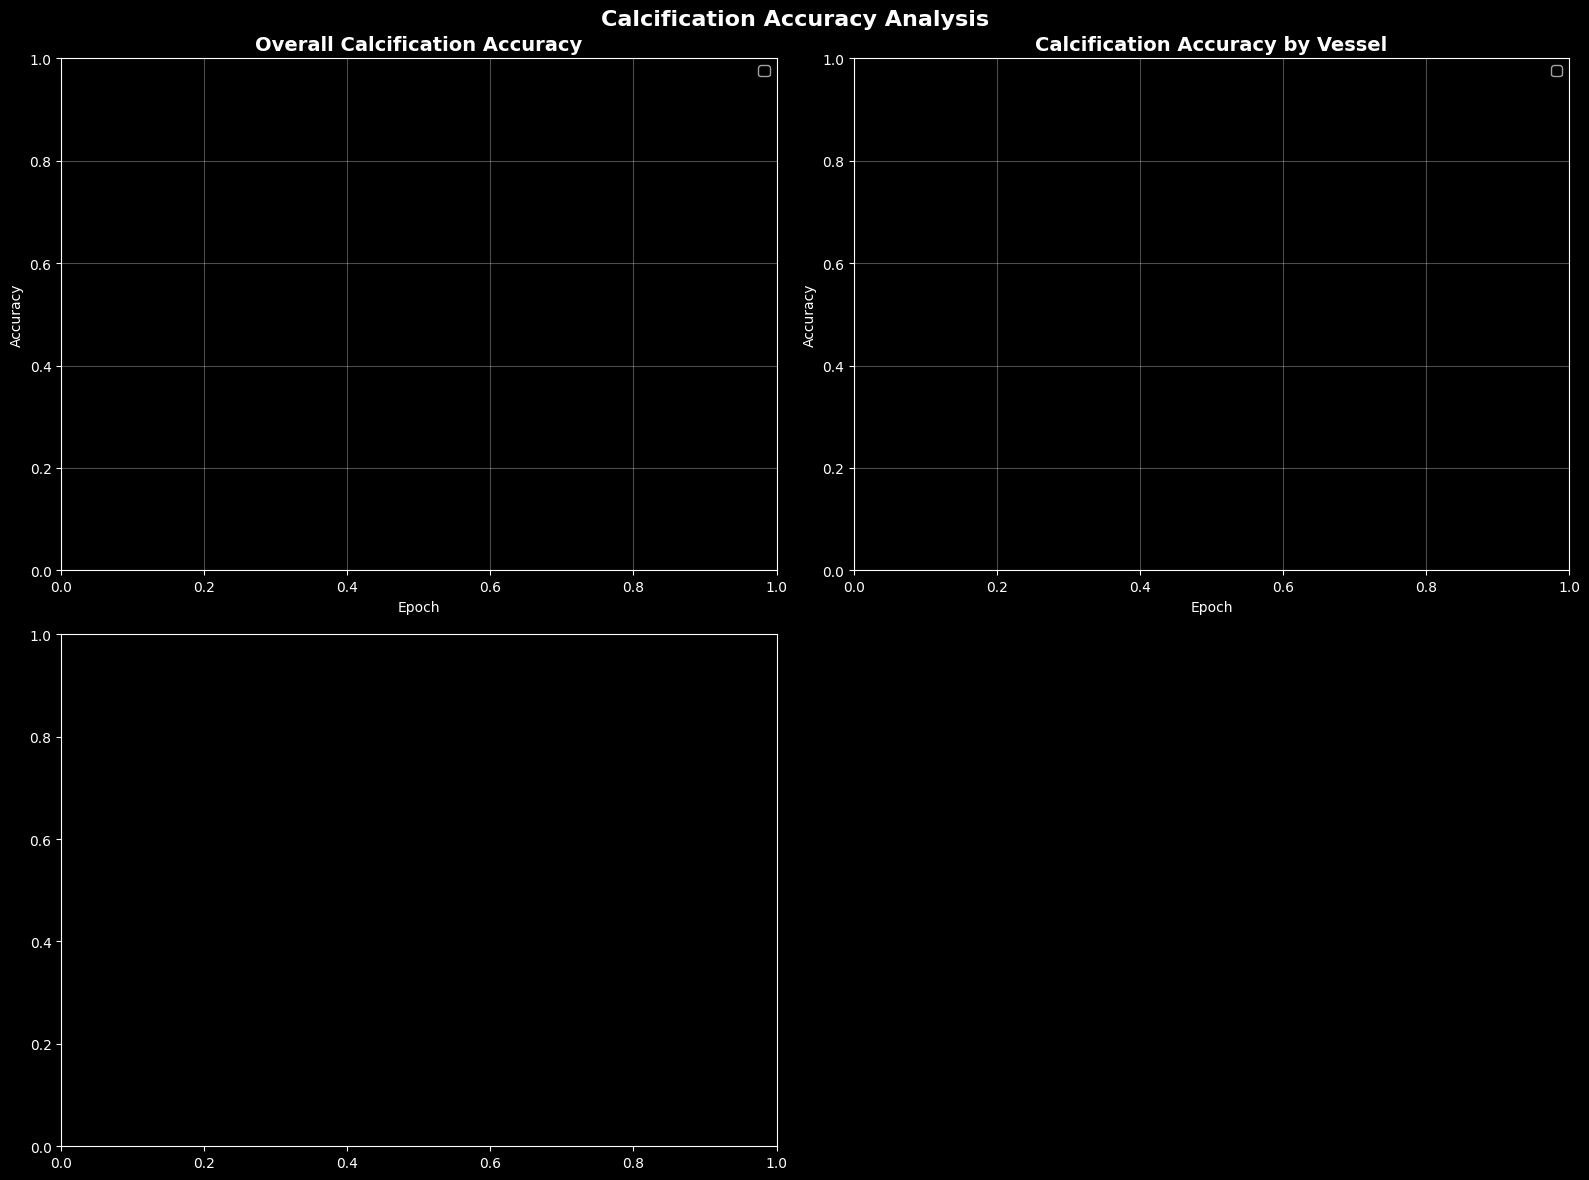

✅ Calcification plots created successfully!


In [10]:
# Cell 5: Calcification Performance Analysis
print("\n" + "="*60)
print("🦴 STEP 4: Calcification Performance Analysis")
print("="*60)

if calcification_metrics and epoch_nums:
    from utils.plot_metrics import plot_calcification_trends
    plot_calcification_trends(calcification_metrics, epoch_nums)
else:
    print("❌ No calcification metrics available for plotting")


In [11]:
# Cell 6: IFR Performance Analysis
print("\n" + "="*60)
print("💉 STEP 5: IFR Performance Analysis")
print("="*60)

if ifr_metrics and epoch_nums:
    from utils.plot_metrics import plot_ifr_trends
    plot_ifr_trends(ifr_metrics, epoch_nums)
else:
    print("❌ No IFR metrics available for plotting")



💉 STEP 5: IFR Performance Analysis
💉 Creating IFR performance visualizations...
❌ No valid IFR MAE values to plot



📊 STEP 6: Combined Performance Analysis
📊 Creating combined performance analysis...


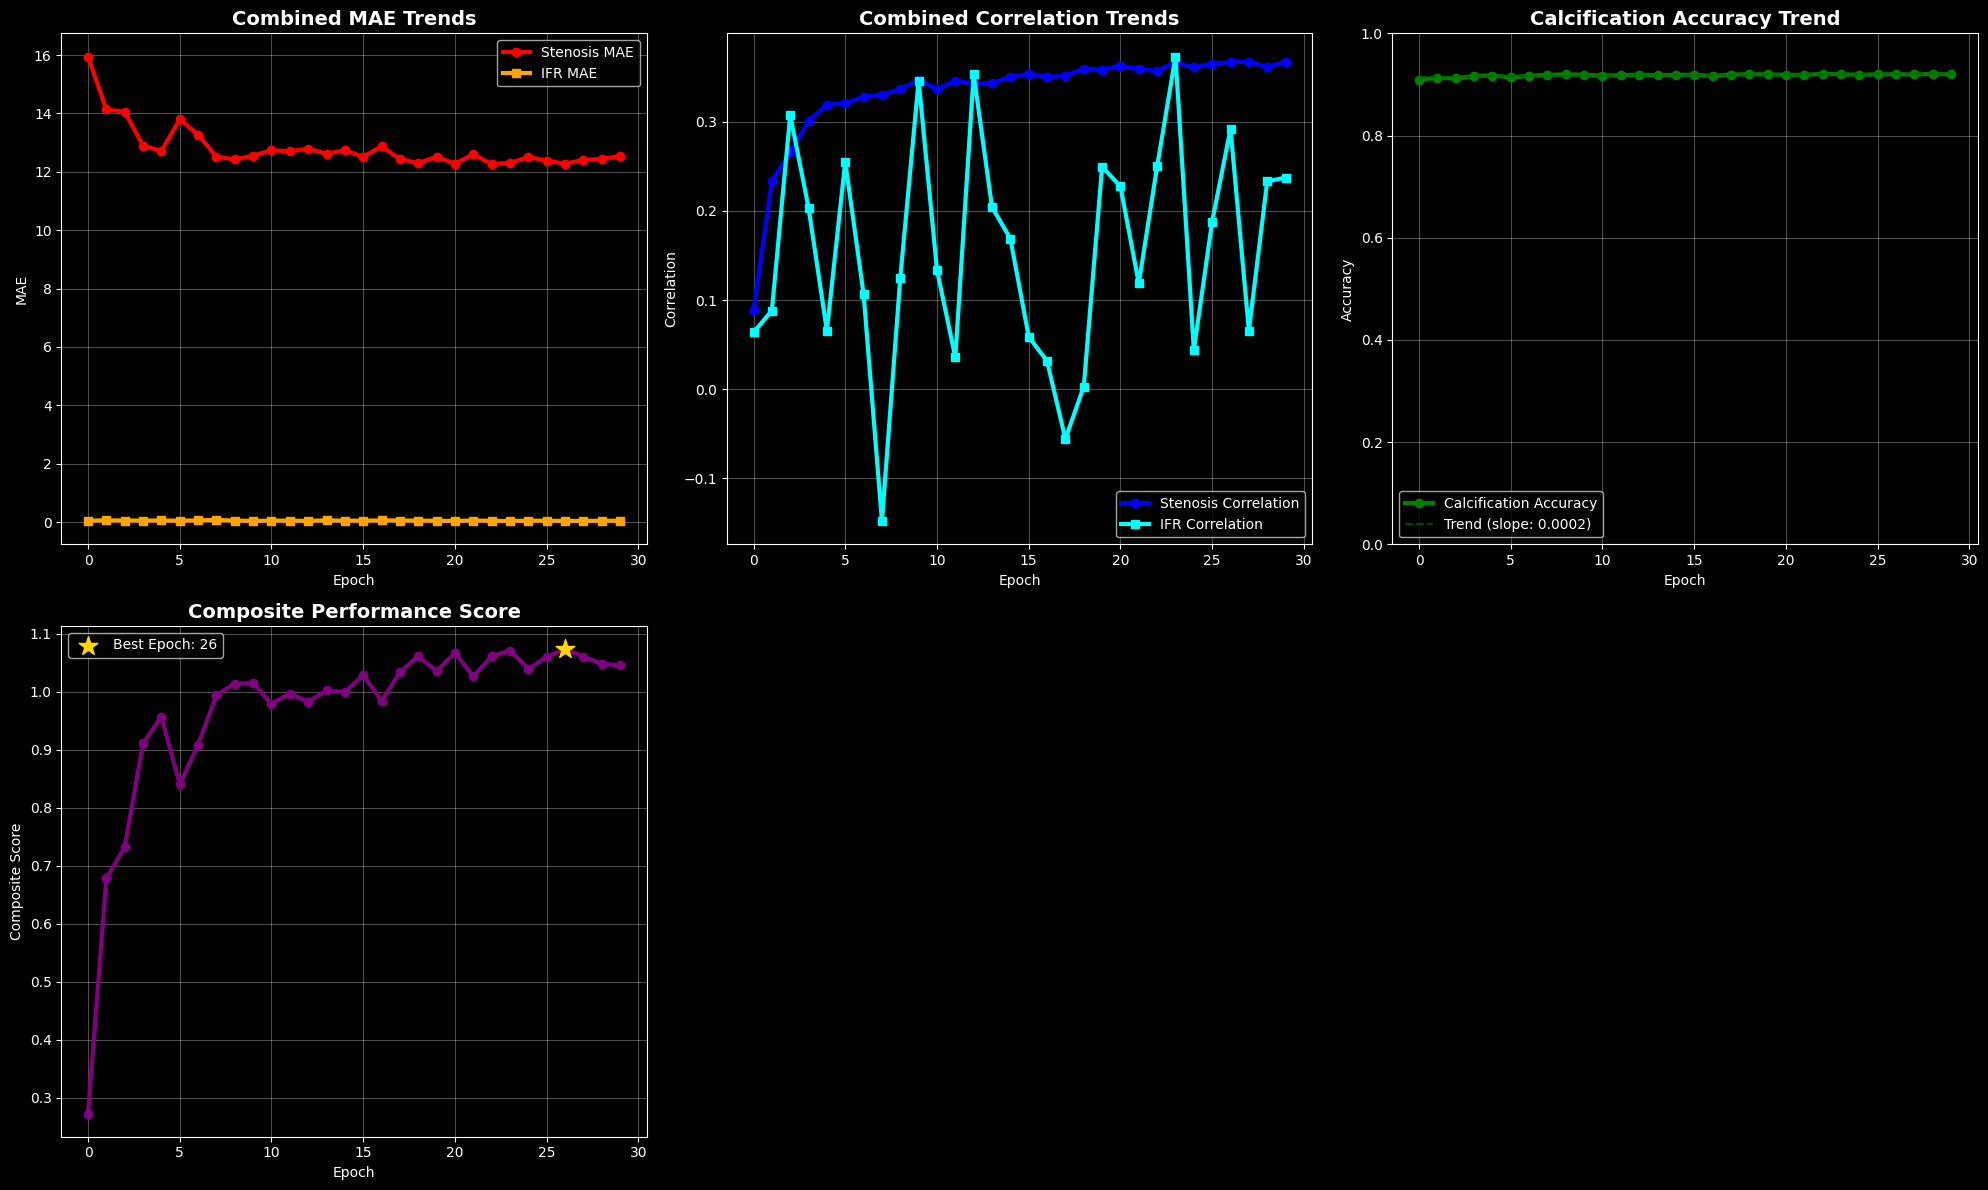


📊 COMPREHENSIVE SUMMARY:
   🏆 Best Overall Epoch: 26 (Score: 1.074)
   📈 Stenosis: MAE 12.28%, Corr 0.367
   🦴 Calcification: Accuracy 0.920
   💉 IFR: MAE 0.0350, Corr 0.292
   💾 Combined results saved: multi_epoch_study_analysis_results/combined_analysis_results.pkl


In [12]:
# Cell 7: Combined Performance Analysis
print("\n" + "="*60)
print("📊 STEP 6: Combined Performance Analysis")
print("="*60)

if all_epoch_metrics and epoch_nums:
    from utils.plot_metrics import create_combined_performance_analysis
    combined_results = create_combined_performance_analysis(all_epoch_metrics, epoch_nums)
    
    # Save results
    if combined_results:
        summary_file = os.path.join(OUTPUT_DIR, "combined_analysis_results.pkl")
        with open(summary_file, 'wb') as f:
            pickle.dump(combined_results, f)
        print(f"   💾 Combined results saved: {summary_file}")
else:
    print("❌ No epoch metrics available for combined analysis!")


In [15]:
# Cell 8: Calcification by Severity Analysis (Debug Version)
print("\n" + "="*60)
print("🔍 STEP 7: Calcification by Severity Analysis")
print("="*60)

if all_epoch_metrics and epoch_nums:
    from utils.plot_metrics import debug_calcification_by_severity
    severity_results = debug_calcification_by_severity(all_epoch_metrics, epoch_nums)
    
    # Save severity analysis results
    if severity_results:
        severity_file = os.path.join(OUTPUT_DIR, "calcification_severity_analysis.pkl")
        with open(severity_file, 'wb') as f:
            pickle.dump(severity_results, f)
        print(f"   💾 Severity analysis saved: {severity_file}")
else:
    print("❌ No calcification data available for severity analysis")



🔍 STEP 7: Calcification by Severity Analysis

🔍 DEBUGGING CALCIFICATION BY SEVERITY ANALYSIS
🔍 Step 1: Examining actual calcification metric names...

📋 Found 17 calcification metrics in epoch 0:
    1. D1_calcif: 0.891
    2. D2_calcif: 0.944
    3. bx_calcif: 0.967
    4. dist_lad_calcif: 0.969
    5. dist_lcx_calcif: 0.985
    6. dist_rca_calcif: 0.921
    7. left_main_calcif: 0.938
    8. lvp_calcif: 0.997
    9. mid_lad_calcif: 0.811
   10. mid_rca_calcif: 0.772
   11. om1_calcif: 0.948
   12. om2_calcif: 0.935
   13. pda_calcif: 0.913
   14. posterolateral_calcif: 0.955
   15. prox_lad_calcif: 0.839
   16. prox_lcx_calcif: 0.887
   17. prox_rca_calcif: 0.790

🔍 Step 2: Searching for severity patterns in ALL epochs...

📊 Total unique calcification metrics across all epochs: 17

🔍 Step 3: Detailed pattern matching analysis...

🔍 Analyzing: 'D1_calcif'
   ✅ MATCH: MILD (pattern: '1_calcif')

🔍 Analyzing: 'D2_calcif'
   ✅ MATCH: MODERATE (pattern: '2_calcif')

🔍 Analyzing: 'bx_calci

In [16]:
# Cell 9: Save Variables for Standalone Script
print("\n" + "="*60)
print("💾 STEP 8: Saving Variables for Standalone Script")
print("="*60)

# Save the key variables to pickle files for standalone script usage
import pickle
import os

# Create variables directory
variables_dir = os.path.join(OUTPUT_DIR, "saved_variables")
os.makedirs(variables_dir, exist_ok=True)

# Save key variables
variables_to_save = {
    'all_epoch_metrics': all_epoch_metrics,
    'epoch_nums': epoch_nums,
    'stenosis_metrics': stenosis_metrics,
    'calcification_metrics': calcification_metrics,
    'ifr_metrics': ifr_metrics,
    'OUTPUT_DIR': OUTPUT_DIR
}

for var_name, var_data in variables_to_save.items():
    if var_data is not None and len(var_data) > 0:
        save_path = os.path.join(variables_dir, f"{var_name}.pkl")
        with open(save_path, 'wb') as f:
            pickle.dump(var_data, f)
        print(f"   ✅ Saved {var_name}: {save_path}")
        
        # Print some info about the saved data
        if isinstance(var_data, dict):
            print(f"      📊 Dictionary with {len(var_data)} keys")
        elif isinstance(var_data, list):
            print(f"      📊 List with {len(var_data)} items")
        else:
            print(f"      📊 Data type: {type(var_data)}")
    else:
        print(f"   ❌ Skipped {var_name}: empty or None")

print(f"\n🎯 Variables saved to: {variables_dir}")
print("📝 You can now use the standalone script for debugging!")



💾 STEP 8: Saving Variables for Standalone Script
   ✅ Saved all_epoch_metrics: multi_epoch_study_analysis_results/saved_variables/all_epoch_metrics.pkl
      📊 Dictionary with 30 keys
   ✅ Saved epoch_nums: multi_epoch_study_analysis_results/saved_variables/epoch_nums.pkl
      📊 List with 30 items
   ✅ Saved stenosis_metrics: multi_epoch_study_analysis_results/saved_variables/stenosis_metrics.pkl
      📊 Dictionary with 15 keys
   ✅ Saved calcification_metrics: multi_epoch_study_analysis_results/saved_variables/calcification_metrics.pkl
      📊 Dictionary with 15 keys
   ✅ Saved ifr_metrics: multi_epoch_study_analysis_results/saved_variables/ifr_metrics.pkl
      📊 Dictionary with 15 keys
   ✅ Saved OUTPUT_DIR: multi_epoch_study_analysis_results/saved_variables/OUTPUT_DIR.pkl
      📊 Data type: <class 'str'>

🎯 Variables saved to: multi_epoch_study_analysis_results/saved_variables
📝 You can now use the standalone script for debugging!
